# JUPYTER NOTEBOOK FOR HOMEWORK 2 
Extracting MFCC features from speech signals and classifying the emotions based on the features
You may need to install librosa - check it out at https://librosa.org/doc/latest/install.html

## I. The set of all required Python library imports have been set up for you; 
###  Feel to add any additional libraries you might want to use

In [1]:
import os, glob, time, sys
import pandas as pd
import tqdm
import csv
import random
from math import ceil
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder

import librosa
import librosa.display
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
import joblib

import torch
import torch.autograd as autograd
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data_utils
from torch.utils.data import Dataset
from torch.utils.data.dataloader import DataLoader

from scipy.io import wavfile

random.seed(45)
data_dir = "TESS"


## II. From the TESS folder, extract the filenamesand write them to file 
### Balance the data as best as possible. Split the 2800 .wav files into training=2240, validation=280 and testing=280,

In [2]:
#Given the number of training, testing and validation splits
# this function generates datasets that are as equally balanced as possible over the number of classes.
# investigate the use of panda dataframes and the dataframe function 'groupby'
# 'return train, test, valid' - three sorted dataframes 
#

def get_data( dir, num_train, num_test, num_valid ):
    sum_num = int(num_train + num_test + num_valid)
    ra_train = int(num_train // sum_num)
    ra_test = int(num_test // sum_num)
    ra_valid = int(num_valid // sum_num)
    allfile = pd.DataFrame(columns=('label','case'))
    train = pd.DataFrame(columns=('label','case'))
    test = pd.DataFrame(columns=('label','case'))
    valid = pd.DataFrame(columns=('label','case'))

    for filepath in glob.glob(f'{dir}/*/*'):
        path = filepath

        lab = filepath.split('/')
        lab = lab[1].split('_')
        lab = lab[-1]
        print(lab)
        allfile = allfile.append(pd.DataFrame({'label':[lab],'case':[path]}),ignore_index=True)
    group_df = allfile.groupby('label')
    print(list(group_df))
    c= 0
    for each in group_df:
        if train.empty:
            
            train = each[1][:320]
            test = each[1][320:360]
            valid = each[1][360:]
        else:
            train_temp = each[1][:320]
            test_temp = each[1][320:360]
            valid_temp = each[1][360:]
            train = pd.concat([train,train_temp],axis=0)
            test = pd.concat([test,test_temp],axis=0)
            valid = pd.concat([valid,valid_temp],axis=0)
            
            c += 1

    print(train)
    print(c)
    return train, test, valid


In [3]:
# extract the different datasets here by calling 'get_data' and save them to CSV files (optional)
# no need to add any code here...
#
tot_train, tot_test, tot_valid = 2240, 280, 280
train_fnames, test_fnames, valid_fnames = get_data( data_dir, tot_train, tot_test, tot_valid )

#save training, testing and validation csv's
csv_train = 'train_filenames.csv'
csv_test = 'test_filenames.csv'
csv_valid = 'valid_filenames.csv'
train_fnames.to_csv( csv_train, index=False )
test_fnames.to_csv( csv_test, index=False )
valid_fnames.to_csv( csv_valid, index=False )
print('done')


disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust
disgust


fear
fear
fear
fear
fear
fear
fear
fear
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry


sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
sad
[('angry',       label                                case
1400  angry   TESS/OAF_angry/OAF_king_angry.wav
1401  angry    TESS/OAF_angry/OAF_rot_angry.wav
1402  angry   TESS/OAF_angry/OAF_hire_angry.wav
1403  angry   TESS/OAF_angry/OAF_take_angry.wav
1404  angry   TESS/OAF_angry/OAF_calm_angry.wav
...     ...                                 ...
2595  angry   TESS/YAF_angry/YAF_walk_angry.wav
2596  angry   TESS/YAF_angry/YAF_

## III. Use librosa to extract features using the filenames;  save features to CSV

In [4]:
# Precalculated values for durations of the .wav files
# This has ben done for you already (we reviewed the max, min and mean durations of the .wav files)
#
minDur = 1.254
avgDur = 2.055
maxDur = 2.984
categories = {'angry': [0],
              'disgust': [1],
              'fear': [2],
              'happy': [3],
              'neutral': [4],
              'sad': [5],
              'surprise': [6]}

In [5]:
# The functions here are used to standardize the input size of each .wav file. 
#  The waveform can be stretched using librosa.effects.time_stretch function,
#  or can parts of the waveform can be replicated to pad the input.
#
def timeStretchWav(y, sr, target_duration):
    
    '***Insert your code here'
    duration = librosa.get_duration(y, sr)
    
    k = duration / target_duration
        
    strech = librosa.effects.time_stretch(y, k)
    
    extra_mfcc = librosa.feature.mfcc(strech, sr, n_mfcc=13)
    
    mfcc = extra_mfcc.flatten()
    
    return mfcc


def replicateGrowWav(y, sr, target_duration):
    
    '***Insert your code here'
    tmp = np.array([])
    
    duration = librosa.get_duration(y,sr)
    k = target_duration - duration
    
    sum_k = int(k * sr)
    while sum_k > 0:
        if sum_k >= len(y):
            tmp = np.append(tmp,y)
            sum_k -= len(y)
        else:
            tmp = np.append(tmp,y[:sum_k])
            sum_k -= len(y)
    y = np.append(y,tmp)
    print(len(y))
    return y

In [6]:
#. Load in a filename and convert it to MFCC using the 'replicate' or 'stretch' method you wrote
#
def convertWavToMFCC(file_name, resize_duration, resize_type):
    
    '***Insert your code here'
    
    tmp_read_wav,ra = np.asarray(librosa.load(file_name))
    #standardize
    if resize_type == 'stretch':
        mfcc = timeStretchWav(tmp_read_wav,ra, resize_duration)
    else:
        mfcc = replicateGrowWav(tmp_read_wav,ra, resize_duration)

    
    return mfcc

In [7]:
# Use this function to extract the features for a given dataset
#  The resulting X should be a stack of numpy arrays of MFCC features for each file in the dataset.
#  The first column of the numpy array is the label string e.g. 'anger', 'sad', etc., and the rest   
#  of the array is the 1677 flattened MFCC features. 
#
def extractFeatures( df, desc ):
    X = np.array([[]])
    '***Insert your code here'
    label = df['label']
    file_name = df['case']
    for file,lab in zip(file_name,label):
        mfcc_set = []
        mfcc = convertWavToMFCC(file, maxDur, 'stretch')
        
        mfcc_set = np.hstack((lab,mfcc))
        if X.size == 0:
            X = [mfcc_set]
        X = np.append(X,[mfcc_set],axis=0)
        
    print(f'Done extracting for {desc}')
    return X

In [75]:
# Call 'extractFeatures' here to generate training, validation and testing features
#  Write the features to .csv files so that they are easily read by the customized dataloader
#  This has been written for you; no need to write anything here
#
# print(train_fnames)
X_train = extractFeatures( train_fnames, 'Training -> ' )
with open('mfcc_train.csv', 'w') as f:
    wr = csv.writer(f)
    wr.writerows(X_train)
print('train done')
X_test = extractFeatures( test_fnames, 'Testing -> ' )
with open('mfcc_test.csv', 'w') as f:
    wr = csv.writer(f)
    wr.writerows(X_test)
print('test done')
X_valid = extractFeatures( valid_fnames, 'Validating -> ' )
with open('mfcc_valid.csv', 'w') as f:
    wr = csv.writer(f)
    wr.writerows(X_valid)
print('valid done')


Done extracting for Validating -> 
valid done


## This section implements a data loader useful for loading the MFCC features into memory for 'torch.nn' processing - You should not need to modify this

In [8]:
## Set LSTM-related parameters
# This has been setup for you (but feel free to modify)
#
input_size = 13
h1 = 50
output_dim = 7
num_layers = 2
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [9]:

def lstm_style_batching(batch):
    data = [item[0] for item in batch]
    label = [item[1] for item in batch]
    data = torch.cat(data, dim=1)
    label = torch.cat(label, dim=0)
    return data, label

In [10]:
#Loader for MFCC speech data (reshapes the data such that input size is 13)
class SpeechLoader(Dataset):
    def __init__(self, dataset_file):
        self.label = list()
        self.dataset = list()
        try:
            with open(dataset_file, 'r') as f:
                csv_reader = csv.reader(f)
                for dat in csv_reader:
                    self.label.append(torch.tensor(categories[dat[0]]))
                    np_array = np.array(dat[1:], dtype=np.float32).reshape(input_size, -1)
                    self.dataset.append(torch.from_numpy(np_array).permute(1, 0).reshape(-1, 1, input_size))
        except FileNotFoundError:
            print('generate features for [' + dataset_file + ']')
            exit(1)
            
    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        return self.dataset[idx], self.label[idx]

    def to(self, device):
        for i in range(len(self.dataset)):
            self.label[i] = self.label[i].to(device=device)
            self.dataset[i] = self.dataset[i].to(device=device)
        return self


In [11]:
#Call the data loaders here on your saved features files as shown below
#
train_loader = DataLoader(SpeechLoader("mfcc_train.csv"),batch_size=16, collate_fn=lstm_style_batching, shuffle=True)
test_loader =  DataLoader(SpeechLoader("mfcc_test.csv"),batch_size=16, collate_fn=lstm_style_batching, shuffle=True)
valid_loader = DataLoader(SpeechLoader("mfcc_valid.csv"),batch_size=16, collate_fn=lstm_style_batching, shuffle=True)


## IV. Implement the 'LSTMSpeechEmo' classification model with 13 input dims and 7 output dims. Choose your number of layers for the model

In [12]:
#Here is the LSTM class for speech emotion
class LSTMSpeechEmo(nn.Module):
    def __init__(self, input_dim, hidden_dim, target_size, num_lstm_layers):
        '***Insert your code here'
        super(LSTMSpeechEmo, self).__init__()
#         self.input_dim = input_dim
        self.num_lstm_layers = num_lstm_layers
        self.hidden_dim = hidden_dim
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_lstm_layers)
        self.linear = nn.Linear(hidden_dim, target_size)

#reference from google, youtube, github, 'pytorch handbook for lstm'
    def forward(self, x, h):
        '***Insert your code here'
        h0 = torch.zeros(self.num_lstm_layers, x.shape[1], h).to(device)
        c0 = torch.zeros(self.num_lstm_layers, x.shape[1], h).to(device)
        out, _  = self.lstm(x, (h0,c0))
        out = out[-1,:,:]
        out =self.linear(out)
        return out

In [13]:
# Implement a function that takes a model (already trained) and a dataset (alread loaded) and 
#  calculates the metrics (loss, accuracy and confusion matrix) resulting from applying the 
#  model on the dataset. NOTE: DO NOT NORMALIZE YOUR CONFUSION MATRIX
#
from sklearn.metrics import confusion_matrix

def validation_metrics (model, dataset):
    '***Insert your code here'
    model.eval()
    total = 0
    accuracy = 0
    
    pre = np.array([])
    lab = np.array([])
    
    with torch.no_grad():
        for data, label in dataset:
            data, label = data.to(device), label.to(device)
            pred = model(data,h1)
            _, pred = pred.max(1)
            accuracy += (pred == label).sum()
            
            total += label.size(0)
            pre = np.append(pre, pred)
            lab = np.append(lab, label)
            
    print(total, accuracy)
    acc = float(accuracy)/float(total)
    
    confusion_matrixd = confusion_matrix(pre,lab)
    
    
    return loss, acc, confusion_matrixd


In [15]:
# Initalize the model, the loss function and the optimizer to be used
# Write the code to train the model
#

learning_rate = 0.001
loss_fn = nn.CrossEntropyLoss()
model = LSTMSpeechEmo(input_size, h1, output_dim, num_layers) 
optimizer = optim.Adam(params=model.parameters(), lr=learning_rate)

#####################
# Train model
#####################
num_epoch = 30


for epoch in range(num_epoch):
    total_loss = 0
    time = 0
    for i, data in enumerate(train_loader,0):
        dat, lab = data
        optimizer.zero_grad()
        y_pred = model(dat,h1)
        loss = loss_fn(y_pred, lab)
        total_loss += loss
        time += 1
        loss.backward()
        optimizer.step()
        
    if epoch%2 == 0:
        print('epoch: loss: ',epoch, total_loss/time)


'***Insert your code here'

epoch: loss:  0 tensor(1.6571, grad_fn=<DivBackward0>)
epoch: loss:  2 tensor(0.8808, grad_fn=<DivBackward0>)
epoch: loss:  4 tensor(0.8731, grad_fn=<DivBackward0>)
epoch: loss:  6 tensor(0.5342, grad_fn=<DivBackward0>)
epoch: loss:  8 tensor(0.6614, grad_fn=<DivBackward0>)
epoch: loss:  10 tensor(0.9893, grad_fn=<DivBackward0>)
epoch: loss:  12 tensor(0.5001, grad_fn=<DivBackward0>)
epoch: loss:  14 tensor(0.3868, grad_fn=<DivBackward0>)
epoch: loss:  16 tensor(0.3188, grad_fn=<DivBackward0>)
epoch: loss:  18 tensor(0.2480, grad_fn=<DivBackward0>)
epoch: loss:  20 tensor(0.5525, grad_fn=<DivBackward0>)
epoch: loss:  22 tensor(0.2444, grad_fn=<DivBackward0>)
epoch: loss:  24 tensor(0.5668, grad_fn=<DivBackward0>)
epoch: loss:  26 tensor(0.2146, grad_fn=<DivBackward0>)
epoch: loss:  28 tensor(0.1430, grad_fn=<DivBackward0>)


'***Insert your code here'

## V. Using  the function 'validation_metrics', accuracies and losses on the test dataset. Generate a confusion matrix for the test dataset.

281 tensor(270)
loss: tensor(0.0126, grad_fn=<NllLossBackward>)
accuracy: 0.9608540925266904
confusion matrix:


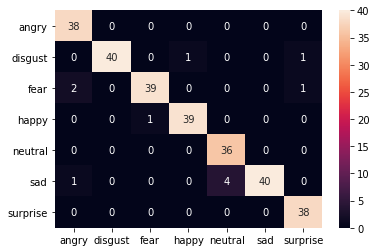

In [16]:
# Call 'validation_metrics' on the test dataset and generate the confusion matrix 
#

'***Insert your code here'

loss_, acc_, confu_matrx = validation_metrics(model, test_loader)
print('loss:',loss_)
print('accuracy:',acc_)
print('confusion matrix:')


ling = ['angry','disgust','fear', 'happy', 'neutral', 'sad', 'surprise']
_, figure = plt.subplots()
sn.heatmap(confu_matrx, annot=True, xticklabels=ling,yticklabels=ling)
plt.show()

## VI. Implement the code needed to load and test your own recorded voice

      label                 case
0   neutral   myself/neutral.wav
1     happy     myself/happy.wav
2       sad       myself/sad.wav
3      fear      myself/fear.wav
4     angry     myself/angry.wav
5   disgust   myself/disgust.wav
6  surprise  myself/surprise.wav
Done extracting for myself voice test -> 
8 tensor(1)
loss. tensor(0.0126, grad_fn=<NllLossBackward>)
my accuracy 0.125


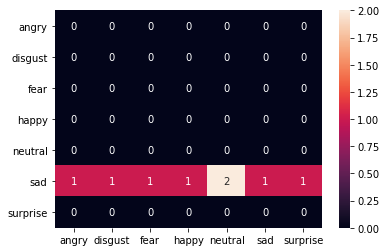

In [17]:
# Manually write your filenames in a .csv file. Extract the MFCC features, save and use data laoder to 
#  load for torch.nn processing. Apply the trained model on the loaded features.
#  Call validation_metrics on your custom data and include the results in your PDF file. 
## 

'***Insert your code here'
myfile = 'myself'
mfile = pd.DataFrame(columns=('label','case'))
for filepath in glob.glob(f'{myfile}/*'):
    lab = filepath.split('/')
    lab = lab[1].split('.')
    lab = lab[0]
#     print(lab)
#     print(filepath)
    mfile = mfile.append(pd.DataFrame({'label':[lab],'case':[filepath]}),ignore_index=True)
mfile.to_csv( 'my_csv', index=False )
print(mfile)

my_f = extractFeatures( mfile, 'myself voice test -> ' )
with open('my_mfcc.csv', 'w') as f:
    wr = csv.writer(f)
    wr.writerows(my_f)
    
my_loader =  DataLoader(SpeechLoader("my_mfcc.csv"),batch_size=16, collate_fn=lstm_style_batching, shuffle=True)
mloss_, macc_, mconfu_matrx = validation_metrics(model, my_loader)
print('loss.',mloss_)
print('my accuracy',macc_)
ling = ['angry','disgust','fear', 'happy', 'neutral', 'sad', 'surprise']
_, figure = plt.subplots()
sn.heatmap(mconfu_matrx, annot=True, xticklabels=ling,yticklabels=ling)
plt.show()